# Covid-19 em SP - por município(s) ou região
# José Eduardo S. Pimentel - @jespimentel

Dados oficiais de SP: http://www.saude.sp.gov.br/cve-centro-de-vigilancia-epidemiologica-prof.-alexandre-vranjac/areas-de-vigilancia/doencas-de-transmissao-respiratoria/coronavirus-covid-19/situacao-epidemiologica

Fonte do Dataset: https://brasil.io/home/ 

In [0]:
# Importação das bibliotecas e criação do DataFrame
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

covid_total_sp = pd.read_csv('https://brasil.io/dataset/covid19/caso?state=SP&format=csv',parse_dates=['date'])
covid_total_sp.rename(columns={'date':'Data', 'state':'Estado', 'city':'Município', 'place_type':'Tipo_UF', 
                               'confirmed':'Confirmados', 'deaths':'Óbitos', 'is_last':'Último?',
                               'estimated_population_2019':'Popul.(2019)', 'city_ibge_code':'Cod.IBGE',
                               'confirmed_per_100k_inhabitants':'Conf./100mil', 'death_rate':'Índ. mort.'}, 
                              inplace=True)

# Configurações do usuário

In [2]:
# CONFIGURAÇÕES DO USUÁRIO

# Seleção do(s) município(s) ou região

'''
- Para alterar, modifique a variável 'cidades_selecionadas', conforme o modelo de lista abaixo.
- Obs.: os nomes dos municípios devem ser grafados de forma idêntica à da lista apresentada abaixo desta célula:
Exemplos: 
cidades_selecionadas = ['Brotas', 'Corumbataí', 'Ipeúna', 'Itirapina', 'Rio Claro', 'Torrinha']
ou
cidades_selecionadas = ['Araras', 'Conchal', 'Cordeirópolis', 'Iracamápolis', 'Leme', 'Limeira', 'Santa Cruz da Conceição', 'Santa Gertrudes']

'''

# NÚMERO DE DIAS PARA A EXIBIÇÃO DOS DADOS
'''
- Para modificar, altere o número da variável 'n', abaixo
'''
n = 14

# EDITE A LISTA ABAIXO CONFORME SUAS NECESSIDADES:

'''
Municípios da mesorregião de Piracicaba
'''
cidades_selecionadas = ['Águas de São Pedro', 'Capivari', 'Charqueada', 'Jurumim', 'Mombuca', 'Piracicaba', 'Rafard', 'Rio das Pedras', 'Saltinho', 'Santa Maria da Serra', 'São Pedro', 'Tietê','Brotas', 'Corumbataí', 'Ipeúna', 'Itirapina', 'Rio Claro', 'Torrinha','Araras', 'Conchal', 'Cordeirópolis', 'Iracamápolis', 'Leme', 'Limeira', 'Santa Cruz da Conceição', 'Santa Gertrudes']

'''
Obs.: Para analisar as cidades com população entre 370 mil e 480 mil habitantes, selecione:
'''
#cidades_selecionadas = ['Mauá', 'São José do Rio Preto', 'Mogi das Cruzes', 'Santos', 'Diadema', 'Jundiaí', 'Piracicaba', 'Carapicuíba', 'Bauru']
'''
Fonte: Wikipedia
Disponível em: <https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_São_Paulo_por_população>. Acesso em: 4 maio 2020.
10º	Mauá	472.912
11º	São José do Rio Preto	460.671
12º	Mogi das Cruzes	445.842
13º	Santos	433.311
14º	Diadema	423.884
15º	Jundiaí	418.962
16º	Piracicaba	404.142
17º	Carapicuíba	400.927
18º	Bauru	376.818
'''
# Exibe a lista dos municípios passíveis de pesquisa:
print (covid_total_sp['Município'].unique())

['Adamantina' 'Adolfo' 'Aguaí' 'Águas da Prata' 'Águas de Lindóia'
 'Águas de Santa Bárbara' 'Águas de São Pedro' 'Agudos' 'Alambari'
 'Altair' 'Altinópolis' 'Alto Alegre' 'Alumínio' 'Álvares Machado'
 'Álvaro de Carvalho' 'Americana' 'Américo Brasiliense'
 'Américo de Campos' 'Amparo' 'Andradina' 'Angatuba' 'Anhembi' 'Anhumas'
 'Aparecida' 'Apiaí' 'Araçariguama' 'Araçatuba' 'Araçoiaba da Serra'
 'Arandu' 'Araraquara' 'Araras' 'Arealva' 'Areiópolis' 'Artur Nogueira'
 'Arujá' 'Assis' 'Atibaia' 'Auriflama' 'Avaí' 'Avanhandava' 'Avaré'
 'Bady Bassitt' 'Bananal' 'Barbosa' 'Bariri' 'Barra Bonita'
 'Barra do Turvo' 'Barretos' 'Barrinha' 'Barueri' 'Batatais' 'Bauru'
 'Bebedouro' 'Bernardino de Campos' 'Bertioga' 'Bilac' 'Birigui'
 'Biritiba-Mirim' 'Bocaina' 'Boituva' 'Bom Jesus dos Perdões' 'Boracéia'
 'Borborema' 'Borebi' 'Botucatu' 'Bragança Paulista' 'Brejo Alegre'
 'Brodowski' 'Brotas' 'Buri' 'Buritama' 'Cabreúva' 'Caçapava'
 'Cachoeira Paulista' 'Caconde' 'Caiabu' 'Caieiras' 'Cajamar' 'C

In [0]:
# Ajustes do DataFrame
covid_total_selecao = covid_total_sp[covid_total_sp['Município'].isin(cidades_selecionadas)]

# Pivoteamento e tratamento dos dados obtidos p/a obtenção de casos/mortes acumulados (por data)
casos_confirmados = covid_total_selecao.pivot(index='Data', columns='Município', values='Confirmados')
casos_confirmados = casos_confirmados.replace ({np.nan: 0})
mortes = covid_total_selecao.pivot (index = 'Data', columns = 'Município', values = 'Óbitos')
mortes = mortes.replace ({np.nan: 0})
evolucao_estado = covid_total_sp[covid_total_sp['Tipo_UF']=='state']
covid_total_selecao_resumo = covid_total_selecao [covid_total_selecao['Último?']==True]
covid_total_selecao_resumo = covid_total_selecao_resumo.replace ({np.nan: 0})

# Recupera o número de dias anteriormente definidos para a exibição dos dados
casos_grafico = casos_confirmados.tail(n)
mortes_grafico = mortes.tail(n)

# Visão geral do Estado de São Paulo

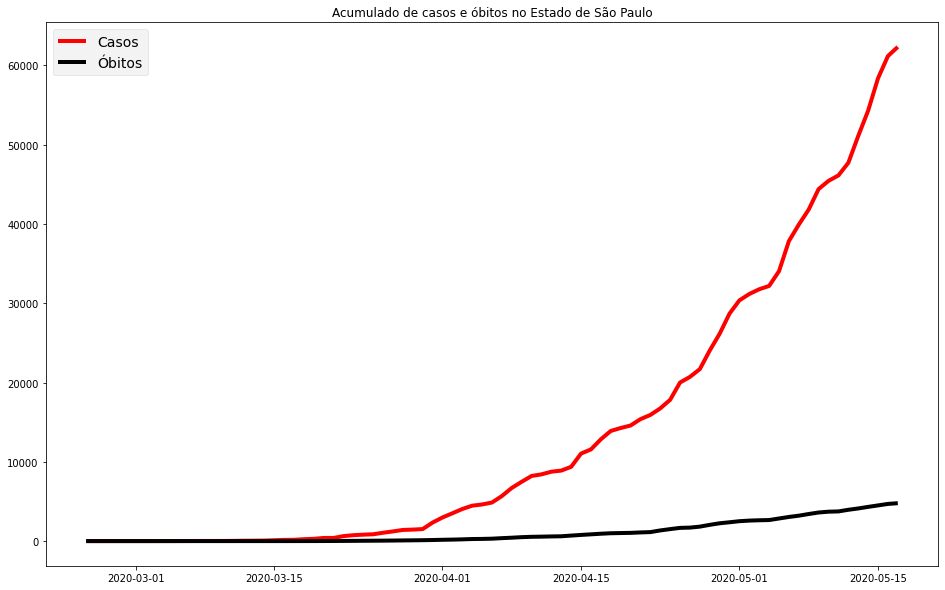

In [4]:
# Acumulado de casos e óbitos no Estado de SP
evolucao_estado
x = evolucao_estado ['Data']
y = evolucao_estado ['Confirmados']
y1 = evolucao_estado ['Óbitos']
register_matplotlib_converters()
plt.figure (figsize = (16, 10))
plt.title ('Acumulado de casos e óbitos no Estado de São Paulo')
plt.style.use ('fivethirtyeight')
plt.plot (x, y, color = 'red', label='Casos')
plt.plot (x,y1, color = 'black', label='Óbitos')
plt.legend()
plt.show()

# Visão dos Município(s) selecionado(s)

In [5]:
# Resumo dos dados selecionados
resumo_dos_dados = covid_total_selecao_resumo.head (len(cidades_selecionadas)).sort_values(by = ['Confirmados'], ascending = False)
resumo_dos_dados.set_index ('Município')

,Data,Estado,Tipo_UF,Confirmados,Óbitos,Último?,Popul.(2019),Cod.IBGE,Conf./100mil,Índ. mort.
Município,,,,,,,,,,
Piracicaba,2020-05-17,SP,city,226,17,True,404142.0,3538709.0,55.92094,0.0752
Limeira,2020-05-17,SP,city,73,1,True,306114.0,3526902.0,23.84732,0.0137
Araras,2020-05-17,SP,city,62,2,True,134236.0,3503307.0,46.18731,0.0323
São Pedro,2020-05-17,SP,city,56,0,True,35653.0,3550407.0,157.06953,0.0000
Cordeirópolis,2020-05-17,SP,city,29,0,True,24528.0,3512407.0,118.23222,0.0000
Rio Claro,2020-05-17,SP,city,26,9,True,206424.0,3543907.0,12.59543,0.3462
Charqueada,2020-05-17,SP,city,18,1,True,17190.0,3511706.0,104.71204,0.0556
Leme,2020-05-17,SP,city,18,3,True,103391.0,3526704.0,17.40964,0.1667
Torrinha,2020-05-17,SP,city,10,0,True,10010.0,3554706.0,99.90010,0.0000


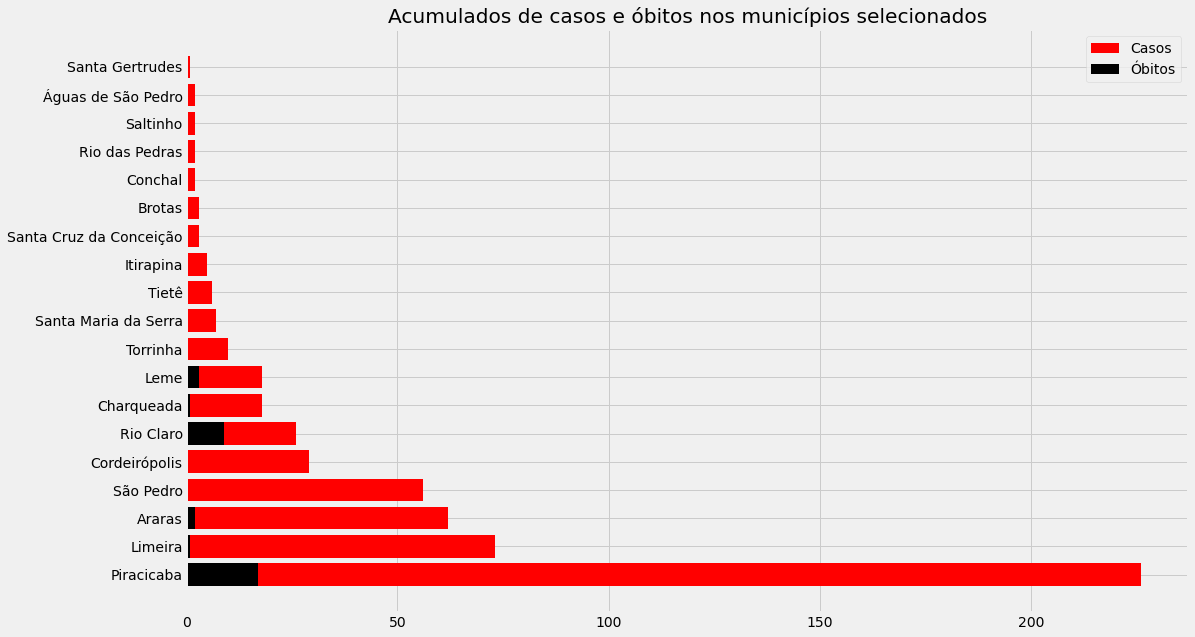

In [6]:
# Gráfico do resumo dos dados selecionados
plt.figure (figsize = (16, 10))
x = resumo_dos_dados['Município']
y = resumo_dos_dados['Confirmados']
y1 = resumo_dos_dados['Óbitos']
plt.title ('Acumulados de casos e óbitos nos municípios selecionados')
plt.style.use ('fivethirtyeight')
plt.barh (x, y, color = 'red', label='Casos')
plt.barh (x,y1, color = 'black', label='Óbitos')
plt.legend()
plt.show()

In [7]:
# Casos acumulados no(s) município(s)/região no período selecionado.
casos_grafico.sort_values (by = ['Data'], ascending = False)

Município,Araras,Brotas,Charqueada,Conchal,Cordeirópolis,Itirapina,Leme,Limeira,Piracicaba,Rio Claro,Rio das Pedras,Saltinho,Santa Cruz da Conceição,Santa Gertrudes,Santa Maria da Serra,São Pedro,Tietê,Torrinha,Águas de São Pedro
Data,,,,,,,,,,,,,,,,,,,
2020-05-17,62.0,3.0,18.0,2.0,29.0,5.0,18.0,73.0,226.0,26.0,2.0,2.0,3.0,1.0,7.0,56.0,6.0,10.0,2.0
2020-05-16,61.0,3.0,18.0,2.0,29.0,5.0,18.0,73.0,216.0,26.0,2.0,2.0,3.0,1.0,7.0,56.0,5.0,10.0,2.0
2020-05-15,60.0,3.0,18.0,2.0,25.0,5.0,18.0,69.0,214.0,25.0,2.0,2.0,3.0,1.0,6.0,56.0,5.0,10.0,2.0
2020-05-14,57.0,3.0,17.0,2.0,25.0,5.0,17.0,69.0,205.0,25.0,2.0,2.0,3.0,1.0,6.0,56.0,5.0,10.0,2.0
2020-05-13,52.0,1.0,15.0,2.0,24.0,4.0,16.0,65.0,170.0,24.0,2.0,2.0,3.0,1.0,5.0,46.0,5.0,10.0,2.0
2020-05-12,38.0,0.0,10.0,2.0,13.0,1.0,12.0,60.0,163.0,23.0,2.0,1.0,3.0,1.0,2.0,40.0,5.0,9.0,2.0
2020-05-11,37.0,0.0,10.0,2.0,13.0,1.0,12.0,61.0,159.0,23.0,2.0,1.0,3.0,1.0,2.0,39.0,3.0,9.0,1.0
2020-05-10,37.0,0.0,10.0,2.0,13.0,1.0,12.0,61.0,158.0,22.0,2.0,1.0,3.0,1.0,2.0,39.0,3.0,9.0,1.0
2020-05-09,37.0,0.0,10.0,2.0,13.0,1.0,12.0,60.0,156.0,23.0,2.0,1.0,3.0,1.0,2.0,39.0,3.0,9.0,1.0


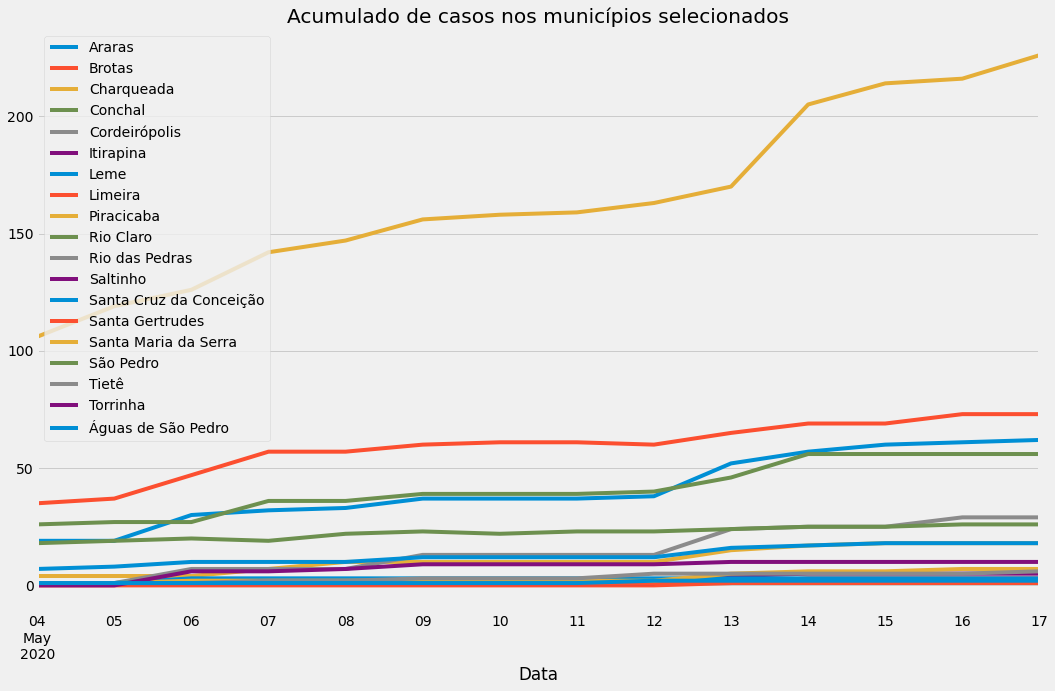

In [8]:
casos_grafico.plot(figsize = (16, 10))
plt.legend (loc = 2)
plt.title ('Acumulado de casos nos municípios selecionados')
plt.show()

In [9]:
# Mortes acumuladas no(s) município(s)/região no período selecionado.
mortes_grafico.sort_values (by = ['Data'], ascending = False)

Município,Araras,Brotas,Charqueada,Conchal,Cordeirópolis,Itirapina,Leme,Limeira,Piracicaba,Rio Claro,Rio das Pedras,Saltinho,Santa Cruz da Conceição,Santa Gertrudes,Santa Maria da Serra,São Pedro,Tietê,Torrinha,Águas de São Pedro
Data,,,,,,,,,,,,,,,,,,,
2020-05-17,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,17.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-16,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,17.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-15,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,17.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-14,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-13,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-12,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-11,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-10,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-09,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


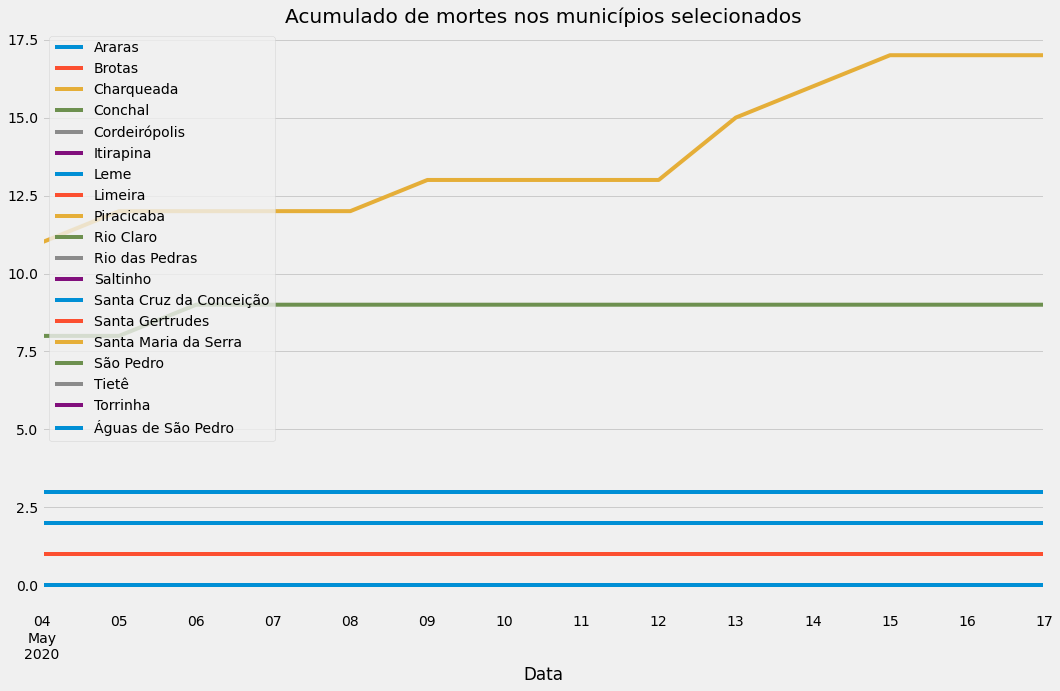

In [10]:
mortes_grafico.plot(figsize = (16, 10))
plt.legend (loc = 2)
plt.title ('Acumulado de mortes nos municípios selecionados')
plt.show()